In [5]:
from sklearn.datasets import load_digits
digit= load_digits()

In [6]:
inputs= digit.data
target= digit.target

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
v= GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[1,3,5,10,15,20]}, cv=10, return_train_score=False)
v.fit(inputs, target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 15, 20]})

In [11]:
v.cv_results_

{'mean_fit_time': array([0.00119143, 0.        , 0.00123794, 0.002724  , 0.00113842,
        0.00048354]),
 'std_fit_time': array([0.00198825, 0.        , 0.00076959, 0.00471801, 0.00068589,
        0.00115546]),
 'mean_score_time': array([0.03455026, 0.03069401, 0.02648172, 0.05049434, 0.0505126 ,
        0.05255342]),
 'std_score_time': array([0.0158321 , 0.00200019, 0.00208093, 0.00938613, 0.0025802 ,
        0.00699187]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 10, 15, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20}],
 'split0_test_score': array([0.93333333, 0.93888889, 0.92777778, 0.91666667, 0.91666667,
        0.90555556]),
 'split1_test_score': array([0.99444444, 1.        , 0.98333333, 0.96111111, 0.96666667,
        0.96666667]),
 'split2_test_score': ar

In [13]:
import pandas as pd
df=pd.DataFrame(v.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001191,0.001988,0.034550,0.015832,1,{'n_neighbors': 1},0.933333,0.994444,0.972222,0.972222,0.966667,0.983333,0.994444,0.988827,0.977654,0.966480,0.974963,0.017080,2
1,0.000000,0.000000,0.030694,0.002000,3,{'n_neighbors': 3},0.938889,1.000000,0.988889,0.972222,0.966667,0.977778,0.983333,0.983240,0.983240,0.972067,0.976633,0.015473,1
2,0.001238,0.000770,0.026482,0.002081,5,{'n_neighbors': 5},0.927778,0.983333,0.977778,0.955556,0.972222,0.972222,0.994444,0.983240,0.983240,0.966480,0.971629,0.017814,3
3,0.002724,0.004718,0.050494,0.009386,10,{'n_neighbors': 10},0.916667,0.961111,0.972222,0.938889,0.966667,0.983333,0.988889,0.977654,0.960894,0.955307,0.962163,0.020458,4
4,0.001138,0.000686,0.050513,0.002580,15,{'n_neighbors': 15},0.916667,0.966667,0.977778,0.944444,0.977778,0.972222,0.983333,0.983240,0.944134,0.955307,0.962157,0.020634,5
5,0.000484,0.001155,0.052553,0.006992,20,{'n_neighbors': 20},0.905556,0.966667,0.977778,0.933333,0.966667,0.972222,0.983333,0.972067,0.949721,0.960894,0.958824,0.022388,6


In [14]:
v.best_score_

0.9766325263811299

In [15]:
v.best_params_

{'n_neighbors': 3}

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [18]:
mod=KNeighborsClassifier(n_neighbors=3)
mod.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
mod.score(X_test, y_test)

0.9888888888888889

In [24]:
y_pred= mod.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'truth')

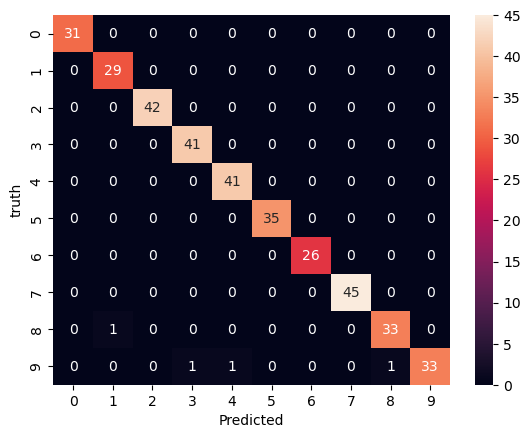

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("truth")

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      1.00      0.98        29
           2       1.00      1.00      1.00        42
           3       0.98      1.00      0.99        41
           4       0.98      1.00      0.99        41
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        45
           8       0.97      0.97      0.97        34
           9       1.00      0.92      0.96        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

